In [76]:
from functools import partial
from geopy.geocoders import Nominatim
from datetime import timedelta, datetime

from sklearn import datasets
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage, dendrogram

import random, pandas as pd
import matplotlib.pyplot as plt

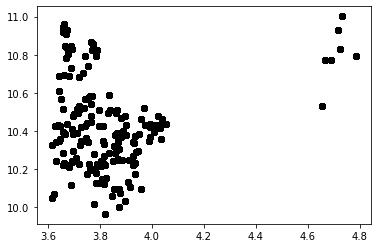

In [109]:
orders = pd.read_excel('dataset_orders_final_new.xlsx')

clust_orders = orders[['latitude to','longtitude to','rapid']].copy()
clust_orders = clust_orders[clust_orders['rapid'] == 0]
clust_orders = clust_orders.drop(['rapid'], axis=1).reset_index()
clust_orders['latitude to'] = (clust_orders['latitude to'] - 55)*10
clust_orders['longtitude to'] = (clust_orders['longtitude to'] - 38)*10

# clust_orders
plt.plot(clust_orders['latitude to'].values, clust_orders['longtitude to'].values, 'o', color='black');

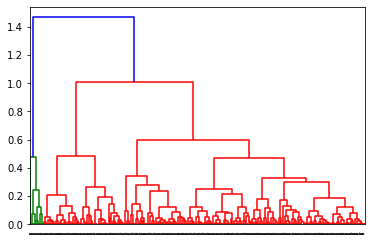

In [104]:

# Извлекаем измерения как массив NumPy
samples = clust_orders.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=1,
           )

plt.show()

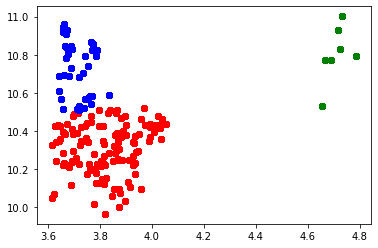

In [111]:
plotlables = ['bo','go','ro','yo']

# Извлекаем измерения как массив NumPy
samples = clust_orders[['latitude to','longtitude to']].values

# Описываем модель
model = KMeans(n_clusters=3)

# Проводим моделирование
model.fit(samples)

# Предсказание на всем наборе данных
all_predictions = model.predict(samples)

all_predictions = pd.DataFrame(all_predictions, columns=['clusters'])
all_predictions['x'] = samples[:,0]
all_predictions['y'] = samples[:,1]
all_predictions['index'] = clust_orders['index']

all_predictions[all_predictions['clusters'] == 1]

for col in all_predictions.clusters.unique():
    plt.plot(all_predictions[all_predictions['clusters'] == col]['x'].values,\
             all_predictions[all_predictions['clusters'] == col]['y'].values,\
             plotlables[int(col)])

In [113]:
output = all_predictions.copy()
output['x'] = output['x']/10+55
output['y'] = output['y']/10+38
output.to_excel('for_peresekator.xlsx',index=False)